# Application of a Trained Model

This tutorial will detail how to use the model from the "Tutorial 4: Train a Simple Regression Model", to make predictions (pIC50) on the test set created based on the data split file from "Tutorial 3: Perform a Split", and the curated dataset from "Tutorial 2: Curating Datasets”.

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from atomsci.ddm.pipeline import predict_from_model as pfm
from sklearn.metrics import r2_score

First, create a test set by selecting the test data from the curated dataset.

In [10]:
split_file_dir = 'dataset/curated_kcna5_ic50_train_valid_test_scaffold_bcd96299-6d61-4467-9e6b-814dcf8cde16.csv'
curated_data_dir = 'dataset/curated_kcna5_ic50.csv'

split_file = pd.read_csv(split_file_dir)
split_file.rename(columns = {'cmpd_id': 'compound_id'}, inplace=True)
curated_data = pd.read_csv(curated_data_dir)


test_data = split_file[split_file['subset'] == 'test'].merge(curated_data, on='compound_id', how='left')
test_data.head()

,compound_id,subset,fold,base_rdkit_smiles,relation,avg_pIC50
0,CHEMBL148356,test,0,C[C@H](OC(=O)NCc1ccccc1-c1cccnc1C(=O)NCC1CC1)c...,NaN,6.397940
1,CHEMBL1290739,test,0,CC(C)(CNC(=O)c1cocn1)CN(C1=NS(=O)(=O)c2cc(F)cc...,NaN,6.045757
2,CHEMBL3127396,test,0,N#Cc1cccc(S(=O)(=O)N(Cc2ccc(F)cc2)C[C@@H]2CCCC...,NaN,5.119186
3,CHEMBL3355573,test,0,N[C@@H](Cn1c(=O)cnc2ccc(F)cc21)[C@H]1CC[C@H](N...,>,4.000000
4,CHEMBL465277,test,0,CC1=C(C(=O)N2CCCCC2)C(c2ccc(Cl)c(Cl)c2)n2nccc2N1,NaN,7.045757


Next, load a pretrained model from a model tarball file and run predictions on compounds in the test set. If the original model response_col was 'avg_pIC50', the returned data frame will contain columns 'avg_pIC50_actual', 'avg_pIC50_pred', and 'avg_pIC50_std'. The predictions of pIC50 is in the column, 'avg_pIC50_pred'.

In [14]:
model_dir = 'dataset/curated_kcna5_ic50_model_ebc39cab-fc9f-4238-827e-241850cee82b.tar.gz'
input_df = test_data
id_col = 'compound_id'
smiles_col = 'base_rdkit_smiles'
response_col = 'avg_pIC50'

pred_df = pfm.predict_from_model_file(model_path = model_dir, 
                                      input_df = test_data,
                                      id_col = id_col ,
                                      smiles_col = smiles_col, 
                                      response_col = response_col)
                                      
pred_df.head()

Standardizing SMILES strings for 121 compounds.


INFO:atomsci.ddm.utils.model_version_utils:dataset/curated_kcna5_ic50_model_ebc39cab-fc9f-4238-827e-241850cee82b.tar.gz, 1.6.0
INFO:atomsci.ddm.utils.model_version_utils:Version compatible check: dataset/curated_kcna5_ic50_model_ebc39cab-fc9f-4238-827e-241850cee82b.tar.gz version = "1.6", AMPL version = "1.6"


num_model_tasks is deprecated and its value is ignored.


/gpfs/gsfs12/users/lup2/AMPL/AMPL_setup_tutorials/atomsci/ddm/pipeline/featurization.py:1734: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  calc_smiles_feat_df[col] = calc_desc_df[col]
/gpfs/gsfs12/users/lup2/AMPL/AMPL_setup_tutorials/atomsci/ddm/pipeline/transformations.py:255: RuntimeWarning: invalid value encountered in divide
  X = np.nan_to_num((X - self.X_means) * X_weight / self.X_stds)


,compound_id,subset,fold,base_rdkit_smiles,relation,avg_pIC50,orig_smiles,avg_pIC50_actual,avg_pIC50_pred,avg_pIC50_std
0,CHEMBL148356,test,0,C[C@H](OC(=O)NCc1ccccc1-c1cccnc1C(=O)NCC1CC1)c...,NaN,6.397940,C[C@H](OC(=O)NCc1ccccc1-c1cccnc1C(=O)NCC1CC1)c...,6.397940,5.932135,0.744248
1,CHEMBL1290739,test,0,CC(C)(CNC(=O)c1cocn1)CN(C1=NS(=O)(=O)c2cc(F)cc...,NaN,6.045757,CC(C)(CNC(=O)c1cocn1)CN(C1=NS(=O)(=O)c2cc(F)cc...,6.045757,5.918953,0.749342
2,CHEMBL3127396,test,0,N#Cc1cccc(S(=O)(=O)N(Cc2ccc(F)cc2)C[C@@H]2CCCC...,NaN,5.119186,N#Cc1cccc(S(=O)(=O)N(Cc2ccc(F)cc2)C[C@@H]2CCCC...,5.119186,5.419587,0.574383
3,CHEMBL3355573,test,0,N[C@@H](Cn1c(=O)cnc2ccc(F)cc21)[C@H]1CC[C@H](N...,>,4.000000,N[C@@H](Cn1c(=O)cnc2ccc(F)cc21)[C@H]1CC[C@H](N...,4.000000,6.113446,0.935121
4,CHEMBL465277,test,0,CC1=C(C(=O)N2CCCCC2)C(c2ccc(Cl)c(Cl)c2)n2nccc2N1,NaN,7.045757,CC1=C(C(=O)N2CCCCC2)C(c2ccc(Cl)c(Cl)c2)n2nccc2N1,7.045757,6.489139,0.359876


Then, calculate the R² score and compare it with the expected R² 
score of `0.205017`, reported in Tutorial 4.

In [17]:
actual_value = pred_df['avg_pIC50_actual']
predicted_value = pred_df['avg_pIC50_pred']
r2 = np.round(r2_score(actual_value, predicted_value), 6)
r2

0.205017

Last, visualize the results in a scatter plot of predicted values.

Text(0.5, 1.0, 'Model Performance on the Test Set')

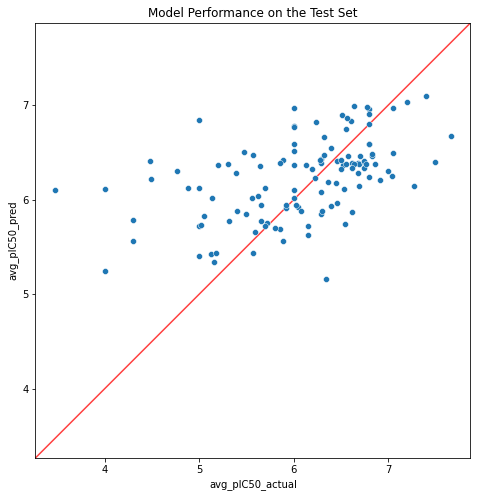

In [19]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(8,8))
ax = sns.scatterplot(x='avg_pIC50_actual', y='avg_pIC50_pred', data=pred_df)
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]
ax.plot(lims, lims, 'r-', alpha=0.75, zorder=0)
plt.gca().set_aspect('equal', adjustable='box')
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)
plt.title('Model Performance on the Test Set')